<a href="https://colab.research.google.com/github/mifardli/RecommendationSystem/blob/main/Steam_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
# Set the environment variables to use the Kaggle API
import os

os.environ['KAGGLE_USERNAME'] = 'mifardli'  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "07d9efa7d12fcf4d61c51ddf3a2b699d"  # Replace with your Kaggle API key

# Replace 'dataset-name' with the Kaggle dataset you want to download
!kaggle datasets download -d fronkongames/steam-games-dataset


 94% 173M/183M [00:01<00:00, 115MB/s]
100% 183M/183M [00:01<00:00, 116MB/s]


In [3]:
# Unzip the downloaded dataset (if it's in zip format)
!unzip -q 'steam-games-dataset.zip'  # Replace 'dataset-name.zip' with the actual zip file name


In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'games.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   About the game              80123 non-null  object 
 9   Supported languages         83560 non-null  object 
 10  Full audio languages        83560 non-null  object 
 11  Reviews                     9716 non-null   object 
 12  Header image                83560 non-null  object 
 13  Website                     390

In [5]:
null_counts = df.isnull().sum()
print(null_counts)

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3437
Supported languages               0
Full audio languages              0
Reviews                       73844
Header image                      0
Website                       44506
Support url                   42544
Support email                 13319
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                79650
User score                        0
Positive                          0
Negative                          0
Score rank                    83516
Achievements                      0
Recommendations                   0
Notes                       

In [6]:

# Specify the columns by which you want to order the DataFrame (replace with your column names)
columns_to_sort = ['User score']

# Sort the DataFrame based on the specified columns in ascending order
df_sorted = df.sort_values(by=columns_to_sort, ascending=False)



In [7]:
df_sorted

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
8563,961640,The Tower of Five Hearts,"Nov 14, 2018",0 - 20000,0,18,14.99,0,Story There are five continents of roughly-equ...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@mangagamer.com,True,True,True,0,NaN,100,16,0,100.0,0,0,"Masturbation, Consensual Sex, Cunnilingus , Fi...",0,0,0,0,TsukiWare,MangaGamer,Single-player,Indie,"Nudity,Indie,Sexual Content,Anime,Mature,Visua...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
59587,912190,Hentai IQ Puzzle,"Sep 8, 2018",0 - 20000,0,0,0.99,2,Hentai IQ Puzzle - a logical game in which you...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,afbikstudio@mail.ru,True,False,False,0,NaN,100,27,1,100.0,50,0,"This game is not a pornographic product, so th...",0,0,0,0,AFBIK Studio,AFBIK Studio,"Single-player,Steam Achievements,Steam Cloud","Adventure,Casual,Indie","Sexual Content,Nudity,Casual,Indie,Adventure,A...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
41482,1013180,Funbag Fantasy,"Jan 31, 2019",0 - 20000,7,18,44.99,0,Description &amp; Features Develop a romantic ...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@mangagamer.com,True,False,False,0,NaN,100,21,0,100.0,0,127,This title is not suitable for players under t...,0,0,0,0,Waffle,MangaGamer,"Single-player,Steam Cloud",Adventure,"Sexual Content,Nudity,Adventure,Visual Novel,A...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
13285,935560,Hentai Strip Shot,"Sep 21, 2018",0 - 20000,0,0,1.19,1,Do you miss or wonder the old school fun of th...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ngoksanguner@gmail.com,True,True,True,0,NaN,100,26,0,100.0,100,0,This game includes stripping imagery of anime ...,49,0,49,0,NAISU,NAISU,"Single-player,Steam Achievements,Steam Leaderb...","Casual,Indie,Strategy","Sexual Content,Nudity,Casual,Indie,Strategy,Anime",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2649,471720,K Station,"Jun 15, 2016",0 - 20000,0,0,0.00,0,"&gt; WHAT IS GOING ON?! It's New Year's Day, 2...",['English'],[],“Kudos to the brilliant writing done in this g...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://twitter.com/yashparghi,https://twitter.com/yashparghi,yash@yashparghi.com,True,False,False,0,NaN,100,10,0,100.0,0,0,NaN,0,0,0,0,Maya Games,Maya Games,"Single-player,Captions available,Steam Cloud","Adventure,Casual,Indie","Adventure,Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,363330,Mind Snares: Alice's Journey,"Apr 23, 2015",50000 - 100000,2,0,9.99,0,Mind Snares: Alice’s Journey is a mature adven...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Simplified Chinese']",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,steam.support@artifexmundi.com,True,True,True,0,NaN,0,621,88,NaN,17,403,NaN,215,0,234,0,World-Loom,Artifex Mundi,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual","Hidden Object,Casual,Adventure,Puzzle,Point & ...",h

In [8]:
# List of columns to be dropped
columns_to_drop = ['AppID', 'Release date', 'Peak CCU', 'About the game', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Recommendations', 'Notes', 'Developers', 'Publishers', 'Screenshots', 'Movies']  # Replace with columns you want to drop

# Drop the specified columns
dfy = df.drop(columns=columns_to_drop, axis=1)

In [9]:
dfy

,Name,Estimated owners,Required age,Price,DLC count,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Categories,Genres,Tags
0,Galactic Bowling,0 - 20000,0,19.99,0,['English'],[],True,False,False,0,0,6,11,NaN,30,0,0,0,0,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,NaN,12,0,0,0,0,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,0 - 20000,0,4.99,0,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,NaN,0,0,0,0,0,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,0 - 20000,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,0,3,0,NaN,0,0,0,0,0,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,0 - 20000,0,0.00,0,"['English', 'Spanish - Spain']",[],True,True,False,0,0,50,8,NaN,17,0,0,0,0,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,Sex Simulator - Office Promotion,0 - 20000,0,3.99,0,['English'],[],True,True,True,0,0,0,0,NaN,3,0,0,0,0,"Single-player,Steam Achievements,Steam Leaderb...","Adventure,Casual,Indie",NaN
83556,UFindO,0 - 20000,0,0.49,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,0,8,1,NaN,10,0,0,0,0,"Single-player,Steam Achievements","Casual,Indie","Casual,Puzzle,Hidden Object,Creature Collector..."
83557,UNDRESS!,0 - 20000,0,1.99,0,"['English', 'Simplified Chinese', 'Korean', 'R...",[],True,False,False,0,0,0,0,NaN,12,0,0,0,0,"Single-player,Steam Achievements",Casual,NaN
83558,Oculant,0 - 20000,0,4.99,0,['English'],[],True,False,False,0,0,0,0,NaN,0,0,0,0,0,Single-player,"Action,Adventure,Casual",NaN


In [10]:
# Fill missing values in the 'Genres' column with an empty string, then convert to one-hot encoding
onehotgenre = dfy['Genres'].fillna('').apply(lambda x: pd.Series({genre: 1 for genre in x.split(',') if x != ''})).fillna(0).astype(int)

# Display the resulting one-hot encoded DataFrame
onehotgenre

Streaming output truncated to the last 5000 lines.
<ipython-input-10-123623f3d0d8>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotgenre = dfy['Genres'].fillna('').apply(lambda x: pd.Series({genre: 1 for genre in x.split(',') if x != ''})).fillna(0).astype(int)
<ipython-input-10-123623f3d0d8>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotgenre = dfy['Genres'].fillna('').apply(lambda x: pd.Series({genre: 1 for genre in x.split(',') if x != ''})).fillna(0).astype(int)
<ipython-input-10-123623f3d0d8>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotgenre = dfy['Genres'].fillna('').apply(lambda x: pd.Series({genre: 1 for ge

,Casual,Indie,Sports,Action,Adventure,Strategy,Free to Play,Massively Multiplayer,RPG,Simulation,Early Access,Racing,Utilities,Education,Sexual Content,Nudity,Violent,Gore,Design & Illustration,Animation & Modeling,Game Development,Web Publishing,Software Training,Photo Editing,Audio Production,Video Production,Accounting,Movie,Documentary,Episodic,Short,Tutorial,360 Video
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83556,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83558,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop the 'Genres' column from the DataFrame
dfy.drop(columns=['Genres'], inplace=True)

In [12]:
dfy

,Name,Estimated owners,Required age,Price,DLC count,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Categories,Tags
0,Galactic Bowling,0 - 20000,0,19.99,0,['English'],[],True,False,False,0,0,6,11,NaN,30,0,0,0,0,"Single-player,Multi-player,Steam Achievements,...","Indie,Casual,Sports,Bowling"
1,Train Bandit,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,NaN,12,0,0,0,0,"Single-player,Steam Achievements,Full controll...","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,0 - 20000,0,4.99,0,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,NaN,0,0,0,0,0,Single-player,NaN
3,Henosis™,0 - 20000,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,0,3,0,NaN,0,0,0,0,0,"Single-player,Full controller support","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,0 - 20000,0,0.00,0,"['English', 'Spanish - Spain']",[],True,True,False,0,0,50,8,NaN,17,0,0,0,0,"Single-player,Steam Achievements","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,Sex Simulator - Office Promotion,0 - 20000,0,3.99,0,['English'],[],True,True,True,0,0,0,0,NaN,3,0,0,0,0,"Single-player,Steam Achievements,Steam Leaderb...",NaN
83556,UFindO,0 - 20000,0,0.49,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,False,0,0,8,1,NaN,10,0,0,0,0,"Single-player,Steam Achievements","Casual,Puzzle,Hidden Object,Creature Collector..."
83557,UNDRESS!,0 - 20000,0,1.99,0,"['English', 'Simplified Chinese', 'Korean', 'R...",[],True,False,False,0,0,0,0,NaN,12,0,0,0,0,"Single-player,Steam Achievements",NaN
83558,Oculant,0 - 20000,0,4.99,0,['English'],[],True,False,False,0,0,0,0,NaN,0,0,0,0,0,Single-player,NaN


In [13]:
# Fill missing values in the 'Genres' column with an empty string, then convert to one-hot encoding
onehotcat = dfy['Categories'].fillna('').apply(lambda x: pd.Series({category: 1 for category in x.split(',') if x != ''})).fillna(0).astype(int)

# Display the resulting one-hot encoded DataFrame
onehotcat

Streaming output truncated to the last 5000 lines.
<ipython-input-13-aefe227ca30b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotcat = dfy['Categories'].fillna('').apply(lambda x: pd.Series({category: 1 for category in x.split(',') if x != ''})).fillna(0).astype(int)
<ipython-input-13-aefe227ca30b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotcat = dfy['Categories'].fillna('').apply(lambda x: pd.Series({category: 1 for category in x.split(',') if x != ''})).fillna(0).astype(int)
<ipython-input-13-aefe227ca30b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  onehotcat = dfy['Categories'].fillna('').apply(lambda x: pd.Serie

,Single-player,Multi-player,Steam Achievements,Partial Controller Support,Full controller support,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,Remote Play on TV,MMO,PvP,Online PvP,Co-op,Online Co-op,In-App Purchases,Steam Cloud,Steam Trading Cards,Shared/Split Screen,Cross-Platform Multiplayer,Remote Play Together,Stats,Shared/Split Screen PvP,Captions available,Steam Workshop,Includes level editor,LAN PvP,LAN Co-op,Shared/Split Screen Co-op,Steam Turn Notifications,VR Support,SteamVR Collectibles,Valve Anti-Cheat enabled,Includes Source SDK,Commentary available,Mods (require HL2),Mods,Tracked Motion Controller Support,Tracked Controller Support,VR Only,VR Supported,HDR available
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83556,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83557,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# List of columns with boolean values to convert
boolean_columns = ['Windows', 'Mac', 'Linux']

# Convert specific boolean columns to 1s and 0s
dfy[boolean_columns] = dfy[boolean_columns].astype(int)

# Display the resulting DataFrame with 1s and 0s for specified boolean columns
dfy

,Name,Estimated owners,Required age,Price,DLC count,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Categories,Tags
0,Galactic Bowling,0 - 20000,0,19.99,0,['English'],[],1,0,0,0,0,6,11,NaN,30,0,0,0,0,"Single-player,Multi-player,Steam Achievements,...","Indie,Casual,Sports,Bowling"
1,Train Bandit,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],1,1,0,0,0,53,5,NaN,12,0,0,0,0,"Single-player,Steam Achievements,Full controll...","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,0 - 20000,0,4.99,0,"['English', 'Portuguese - Brazil']",[],1,0,0,0,0,0,0,NaN,0,0,0,0,0,Single-player,NaN
3,Henosis™,0 - 20000,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],1,1,1,0,0,3,0,NaN,0,0,0,0,0,"Single-player,Full controller support","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,0 - 20000,0,0.00,0,"['English', 'Spanish - Spain']",[],1,1,0,0,0,50,8,NaN,17,0,0,0,0,"Single-player,Steam Achievements","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,Sex Simulator - Office Promotion,0 - 20000,0,3.99,0,['English'],[],1,1,1,0,0,0,0,NaN,3,0,0,0,0,"Single-player,Steam Achievements,Steam Leaderb...",NaN
83556,UFindO,0 - 20000,0,0.49,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],1,0,0,0,0,8,1,NaN,10,0,0,0,0,"Single-player,Steam Achievements","Casual,Puzzle,Hidden Object,Creature Collector..."
83557,UNDRESS!,0 - 20000,0,1.99,0,"['English', 'Simplified Chinese', 'Korean', 'R...",[],1,0,0,0,0,0,0,NaN,12,0,0,0,0,"Single-player,Steam Achievements",NaN
83558,Oculant,0 - 20000,0,4.99,0,['English'],[],1,0,0,0,0,0,0,NaN,0,0,0,0,0,Single-player,NaN


In [49]:
print(df['Supported languages'].nunique())

11130


In [16]:
# Fill missing values in the 'Genres' column with an empty string, then convert to one-hot encoding
onehotplay = df['Estimated owners'].fillna('').apply(lambda x: pd.Series({owner: 1 for owner in x.split(',') if x != ''})).fillna(0).astype(int)

# Display the resulting one-hot encoded DataFrame
onehotplay

,0 - 20000,50000 - 100000,20000 - 50000,200000 - 500000,100000 - 200000,2000000 - 5000000,0 - 0,500000 - 1000000,1000000 - 2000000,20000000 - 50000000,5000000 - 10000000,10000000 - 20000000,50000000 - 100000000,100000000 - 200000000
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,1,0,0,0,0,0,0,0,0,0,0,0,0,0
83556,1,0,0,0,0,0,0,0,0,0,0,0,0,0
83557,1,0,0,0,0,0,0,0,0,0,0,0,0,0
83558,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop the 'Genres' column from the DataFrame
dfy.drop(columns=['Categories'], inplace=True)

In [ ]:
print(df['Supported languages'].info)

<bound method Series.info of 0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4                           ['English', 'Spanish - Spain']
                               ...                        
83555                                          ['English']
83556    ['English', 'French', 'Italian', 'German', 'Sp...
83557    ['English', 'Simplified Chinese', 'Korean', 'R...
83558                                          ['English']
83559    ['English', 'French', 'Italian', 'German', 'Sp...
Name: Supported languages, Length: 83560, dtype: object>


In [ ]:
dfsampel = df['Supported languages'].copy()

In [47]:
dfy = df.copy()

# Function to clean language names and create one-hot encoding
def create_one_hot(dfy, col_name):
    unique_languages = set()

    # Extracting unique languages
    for index, row in dfy.iterrows():
        languages = row[col_name].strip('][').split(', ')
        for language in languages:
            # Remove quotes and unwanted characters
            language = re.sub(r'[\'"\[\]{}]', '', language.strip())
            if language:
                unique_languages.add(language)

    # Create one-hot encoding columns for each unique language
    for language in unique_languages:
        df['UIInter_' + language] = 0

    # Iterate through the rows and mark the presence of languages with 1
    for index, row in dfy.iterrows():
        languages = row[col_name].strip('][').split(', ')
        for language in languages:
            # Remove quotes and unwanted characters
            language = re.sub(r'[\'"\[\]{}]', '', language.strip())
            if language:
                dfy.at[index, 'UIInter_' + language] = 1

    return dfy

# Apply one-hot encoding to the 'Supported languages' column
result_df = create_one_hot(dfy, 'Supported languages')

<ipython-input-47-5a46f1e2e37d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['UIInter_' + language] = 0
<ipython-input-47-5a46f1e2e37d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['UIInter_' + language] = 0
<ipython-input-47-5a46f1e2e37d>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

In [48]:
result_df

,Name,Estimated owners,Required age,Price,DLC count,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Tags,UIInter_English,UIInter_French,UIInter_Italian,UIInter_German,UIInter_Spanish - Spain,UIInter_Japanese,UIInter_Portuguese - Brazil,UIInter_Russian,UIInter_Simplified Chinese,UIInter_Traditional Chinese,UIInter_Korean,UIInter_Portuguese,UIInter_Danish,UIInter_Polish,UIInter_Turkish,UIInter_Czech,UIInter_Hungarian,UIInter_Dutch,UIInter_Ukrainian,UIInter_Spanish - Latin America,UIInter_Arabic,UIInter_Norwegian,UIInter_Romanian,UIInter_Swedish,UIInter_Thai,UIInter_Vietnamese,UIInter_Finnish,UIInter_Bulgarian,UIInter_Greek,UIInter_\r\nFrench,UIInter_\r\nGerman,UIInter_German;,"UIInter_English,German,Spanish - Spain,#lang_français",UIInter_Russian\r\nEnglish\r\nSpanish - Spain\r\nFrench\r\nJapanese\r\nCzech,UIInter_English&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_French&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_Italian&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_German&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_Spanish - Spain&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_Korean&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_Japanese &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt;&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;,UIInter_Traditional Chinese (text only),UIInter_Englishb/b,UIInter_Frenchb/b,UIInter_Italianb/b,UIInter_Germanb/b,UIInter_Spanish - Spainb/b,UIInter_Koreanb/b,UIInter_Japanese \r\n\r\nb/b,UIInter_Italian \r\n\r\nb/b,UIInter_English (full audio),UIInter_Russian\r\nb/b,UIInter_Spanish - Spain\r\nb/b,UIInter_ Korean,"UIInter_Hungarian,Polish",UIInter_Slovakian,UIInter_English\r\nRussian\r\nSpanish - Spain\r\nJapanese\r\nCzech,UIInter_Japanese (all with full audio support),UIInter_English Dutch English,UIInter_Portuguese - Portugal,UIInter_Afrikaans,UIInter_Amharic,UIInter_Albanian,UIInter_Assamese,UIInter_Azerbaijani,UIInter_Bangla,UIInter_Basque,UIInter_Belarusian,UIInter_Bosnian,UIInter_Dari,UIInter_Indonesian,UIInter_Armenian,UIInter_Estonian,UIInter_Persian,UIInter_Filipino,UIInter_Welsh,UIInter_Galician,UIInter_Gujarati,UIInter_Georgian,UIInter_Hausa,UIInter_Hindi,UIInter_Croatian,UIInter_Kannada,UIInter_Catalan,UIInter_Kazakh,UIInter_Quechua,UIInter_Kiche,UIInter_Khmer,UIInter_Konkani,UIInter_Kyrgyz,UIInter_Latvian,UIInter_Lithuanian,UIInter_Luxembourgish,UIInter_Macedonian,UIInter_Malayalam,UIInter_Malay,UIInter_Maltese,UIInter_Maori,UIInter_Marathi,UIInter_Mongolian,UIInter_Nepali,UIInter_Odia,UIInter_Punjabi (Gurmukhi),UIInter_Punjabi (Shahmukhi),UIInter_Kinyarwanda,UIInter_Sinhala,UIInter_Sindhi,UIInter_Slovak,UIInter_Slovenian,UIInter_Sorani,UIInter_Sotho,UIInter_Swahili,UIInter_Serbian,UIInter_Tajik,UIInter_Tamil,UIInter_Tatar,UIInter_Telugu,UIInter_Tigrinya,UIInter_Tswana,UIInter_Turkmen,UIInter_Urdu,UIInter_Uyghur,UIInter_Valencian,UIInter_Wolof,UIInter_Xhosa,UIInter_Yoruba,UIInter_Zulu,UIInter_Cherokee,UIInter_Uzbek,UIInter_Hebrew,UIInter_Igbo,UIInter_Irish,UIInter_Scots,UIInter_Icelandic
0,Galactic Bowling,0 - 20000,0,19.99,0,['English'],[],1,0,0,0,0,6,11,NaN,30,0,0,0,0,"Indie,Casual,Sports,Bowling",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Train Bandit,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],1,1,0,0,0,53,5,NaN,12,0,0,0,0,"Indie,Action,Pixel Graphics

In [19]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,1,0,0,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,1,1,0,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,1,0,0,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,1,1,1,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,1,1,0,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,2591500,Sex Simulator - Office Promotion,"Sep 16, 2023",0 - 20000,0,0,3.99,0,ABOUT THE GAME A sex simulation game with visu...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.exosyphen.com,http://www.exosyphen.com,contact@exosyphenstudios.com,1,1,1,0,NaN,0,0,0,NaN,3,0,The game graphically depicts sex in still imag...,0,0,0,0,EroticGamesClub,EroticGamesClub,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
83556,2540690,UFindO,"Aug 21, 2023",0 - 20000,0,0,0.49,0,Are you ready to find the difference? Then qui...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,Sozinov-2003@mail.ru,1,0,0,0,NaN,0,8,1,NaN,10,0,NaN,0,0,0,0,Piece Of Voxel,Piece Of Voxel,"Casual,Puzzle,Hidden Object,Creature Collector...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...

In [15]:
dfy['Required age'].nunique()

19

In [18]:
# Find unique values in the 'Required age' column
unique_age_values = dfy['Required age'].unique()

# Create a new DataFrame for one-hot encoding
onehotage = pd.DataFrame()

# Iterate through unique values and create one-hot encoded columns
for age_value in unique_age_values:
    column_name = f"age_{age_value}"  # Create column name based on age value
    onehotage[column_name] = (dfy['Required age'] == age_value).astype(int)

# Display the resulting one-hot encoded DataFrame
onehotage

,age_0,age_17,age_18,age_10,age_13,age_16,age_6,age_14,age_12,age_15,age_3,age_21,age_7,age_5,age_20,age_1,age_19,age_9,age_11
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83555,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83556,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
new_df = df[['Name', 'Price']].copy()

In [22]:
new_df

,Name,Price
0,Galactic Bowling,19.99
1,Train Bandit,0.99
2,Jolt Project,4.99
3,Henosis™,5.99
4,Two Weeks in Painland,0.00
...,...,...
83555,Sex Simulator - Office Promotion,3.99
83556,UFindO,0.49
83557,UNDRESS!,1.99
83558,Oculant,4.99


In [21]:
new_df = pd.concat([new_df, onehotage], axis=1)

In [7]:
new_df

,Name,Price
0,Galactic Bowling,19.99
1,Train Bandit,0.99
2,Jolt Project,4.99
3,Henosis™,5.99
4,Two Weeks in Painland,0.00
...,...,...
83555,Sex Simulator - Office Promotion,3.99
83556,UFindO,0.49
83557,UNDRESS!,1.99
83558,Oculant,4.99


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'price' column and reshape it into a 2D array
price_column = new_df['Price'].values.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'price' column using Min-Max scaling
scaled_price = scaler.fit_transform(price_column)

# Assign the scaled values back to the DataFrame
new_df['Price'] = scaled_price

In [24]:
new_df

,Name,Price
0,Galactic Bowling,0.01999
1,Train Bandit,0.00099
2,Jolt Project,0.00499
3,Henosis™,0.00599
4,Two Weeks in Painland,0.00000
...,...,...
83555,Sex Simulator - Office Promotion,0.00399
83556,UFindO,0.00049
83557,UNDRESS!,0.00199
83558,Oculant,0.00499


In [25]:
# Assuming 'new_df' is your DataFrame
new_df.dropna(inplace=True)

# Check the shape after dropping NaN values
print("Shape after dropping NaN values:", new_df.shape)


Shape after dropping NaN values: (83554, 2)


In [26]:
new_df

,Name,Price
0,Galactic Bowling,0.01999
1,Train Bandit,0.00099
2,Jolt Project,0.00499
3,Henosis™,0.00599
4,Two Weeks in Painland,0.00000
...,...,...
83555,Sex Simulator - Office Promotion,0.00399
83556,UFindO,0.00049
83557,UNDRESS!,0.00199
83558,Oculant,0.00499


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Count of elements in each cluster:
1    58059
0    22718
4     2665
2      109
3        3
Name: Cluster, dtype: int64


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32456 (\N{CJK UNIFIED IDEOGRAPH-7EC8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38450 (\N{CJK UNIFIED IDEOGRAPH-9632}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21355 (\N{CJK UNIFIED IDEOGRAPH-536B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24618 (\N{CJK UNIFIED IDEOGRAPH-602A}) missing from current fo

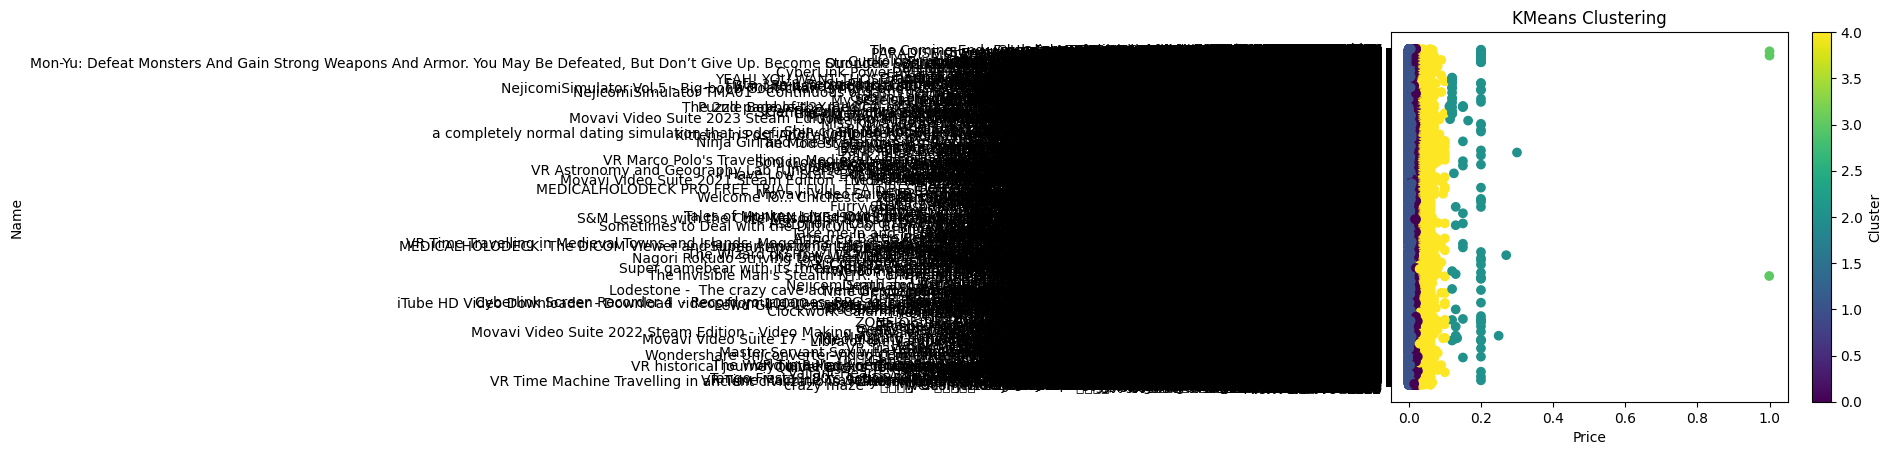

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming dfy is your DataFrame containing 'Name' and 'Price' columns
data_for_clustering = new_df[['Name', 'Price']]  # Selecting 'Name' and 'Price' columns

# Assuming 'Price' column needs to be reshaped to fit KMeans algorithm
X = data_for_clustering['Price'].values.reshape(-1, 1)

# Choose the number of clusters (you can experiment with different values)
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels back to the DataFrame
data_for_clustering['Cluster'] = kmeans.labels_

# Display the count of elements in each cluster
print("Count of elements in each cluster:")
print(data_for_clustering['Cluster'].value_counts())

# Visualize the clusters
plt.scatter(data_for_clustering['Price'], data_for_clustering['Name'], c=data_for_clustering['Cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Concatenate one_hot_encoded to df along the columns axis
#df = pd.concat([df, one_hot_encoded], axis=1)